## Basic data exploration of the data

In [1]:
#Importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Set working directory
cwd = os.getcwd()

In [4]:
#Importing the data
df_comment = pd.read_csv(cwd+"/data/Comment_dataset_processed.csv")
df_post = pd.read_csv(cwd+"/data/Post_dataset_processed.csv")
#Visualizing what we currently have
print(f'The comment dataset has {df_comment.shape[0]} rows and these columns \n{df_comment.columns}\n')
print(f'The post dataset has {df_post.shape[0]} rows and these columns \n{df_post.columns}')

The comment dataset has 323799 rows and these columns 
Index(['Subreddit', 'ID of Post', 'Comment Text', 'Score', 'Author',
       'Date & Time', 'Length Comment'],
      dtype='object')

The post dataset has 1067 rows and these columns 
Index(['ID of Post', 'Subreddit', 'Title Post', 'Post Text', 'Author', 'Score',
       'Number of Comments', 'URL of Post', 'Date & Time', 'Text of URL Post'],
      dtype='object')


In [3]:
#Taking the columns "Comment Text", "Score", "Author" and "Date & Time" from the df_comment and combining with the df_subs based on the "ID of Post" column
df_all = pd.merge(df_post, df_comment[
    ["ID of Post", 
    "Comment Text", 
    "Score", 
    "Author", 
    "Date & Time"]
    ], on="ID of Post")
#Changing the column names to be more descriptive
df_all.rename(columns={
    "Score_y": "Score of Comment",
    "Score_x": "Score of Post",
    "Date & Time_y": "Date & Time of Comment",
    "Date & Time_x": "Date & Time of Post",
    "Author_y": "Author of Comment",
    "Author_x": "Author of Post"
    }, inplace=True)

df_all.head()

,ID of Post,Subreddit,Title Post,Post Text,Author of Post,Score of Post,Number of Comments,URL of Post,Date & Time of Post,Text of URL Post,Comment Text,Score of Comment,Author of Comment,Date & Time of Comment
0,12cobqr,ChatGPT,Was curious if GPT-4 could recognize text art,,Outrageous_Bee4464,35791,619,https://redd.it/12cobqr,2023-04-05 17:39:56,"can you recognize this: 2888 1 #hhhhhh#e:. ""##...",Recognizing ASCII shrek is the last step to AGI,2180,EwaldvonKleist,2023-04-05 18:30:30
1,12cobqr,ChatGPT,Was curious if GPT-4 could recognize text art,,Outrageous_Bee4464,35791,619,https://redd.it/12cobqr,2023-04-05 17:39:56,"can you recognize this: 2888 1 #hhhhhh#e:. ""##...","That's , green icon",644,anonymoose137,2023-04-05 18:35:14
2,12cobqr,ChatGPT,Was curious if GPT-4 could recognize text art,,Outrageous_Bee4464,35791,619,https://redd.it/12cobqr,2023-04-05 17:39:56,"can you recognize this: 2888 1 #hhhhhh#e:. ""##...",It’s not though,358,I_am_purrfect,2023-04-05 18:31:39
3,12cobqr,ChatGPT,Was curious if GPT-4 could recognize text art,,Outrageous_Bee4464,35791,619,https://redd.it/12cobqr,2023-04-05 17:39:56,"can you recognize this: 2888 1 #hhhhhh#e:. ""##...",This is not,526,vitorgrs,2023-04-05 18:38:06
4,12cobqr,ChatGPT,Was curious if GPT-4 could recognize text art,,Outrageous_Bee4464,35791,619,https://redd.it/12cobqr,2023-04-05 17:39:56,"can you recognize this: 2888 1 #hhhhhh#e:. ""##...",Can someone in the comments please do this aga...,138,Soibi0gn,2023-04-05 18:48:17


In [7]:
#Basic data exploration
print(f'The amount of posts scraped is: {df_post.shape[0]}\n')
print(f'The number of comments scraped is: {df_comment.shape[0]}\n')
print(f'The amount of subreddits that have mentioned ChatGPT is: {df_all["Subreddit"].nunique()}\n')
print(f'The amount of unique authors of posts is: {df_post["Author"].nunique()}\n')
print(f'The amount of unique authors of comments is: {df_comment["Author"].nunique()}\n')
print(f'The list of all the subreddit that have mentioned ChatGPT in given timeframe: \n{df_post["Subreddit"].unique()}')

The amount of posts scraped is: 1067

The number of comments scraped is: 323799

The amount of subreddits that have mentioned ChatGPT is: 76

The amount of unique authors of posts is: 943

The amount of unique authors of comments is: 104891

The list of all the subreddit that have mentioned ChatGPT in given timeframe: 
['ChatGPT' 'technology' 'Futurology' 'ProgrammerHumor' 'gaming'
 'nextfuckinglevel' 'anime_titties' 'MapPorn' 'facepalm' 'Showerthoughts'
 'singularity' 'AusMemes' 'Piracy' 'Kanye' 'tech' 'WorkReform' 'Teachers'
 'GPT3' 'webdev' 'self' 'technews' 'conspiracy' 'MxRMods' 'books'
 'EnoughMuskSpam' 'antiwork' 'cybersecurity' 'dividends' 'thatHappened'
 'coys' 'italy' 'OpenAI' 'tylerthecreator' 'nosleep' 'wallstreetbets'
 'midjourney' 'INTP' 'ChatGPTPro' 'Destiny' 'kotor' 'LifeProTips'
 'gadgets' 'HolUp' 'Professors' 'mauerstrassenwetten' 'sales' 'Ultrakill'
 'Genshin_Impact' 'CryptoCurrency' 'bindingofisaac' 'French'
 'magicthecirclejerking' 'sweden' 'MacOS' 'overemployed' '

### Visualization

In [3]:
#Converting "Date & Time" column to datetime format
df_post["Date & Time"] = pd.to_datetime(df_post["Date & Time"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

#Dropping rows with missing values (just in case)
df_post.dropna(subset=["Date & Time"], inplace=True)

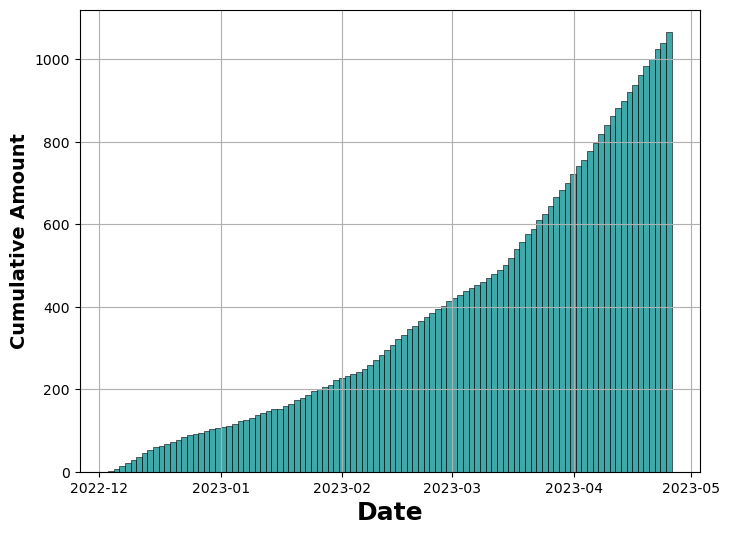

In [4]:
#Plotting the cumulative amount of posts over time
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=df_post, x='Date & Time', bins=100, kde=False, ax=ax, color="darkcyan", cumulative=True)

ax.set_ylabel('Cumulative Amount', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=18, fontweight='bold')

plt.grid()
plt.show()

Plot of all posts over time: Axes(0.125,0.11;0.775x0.77)


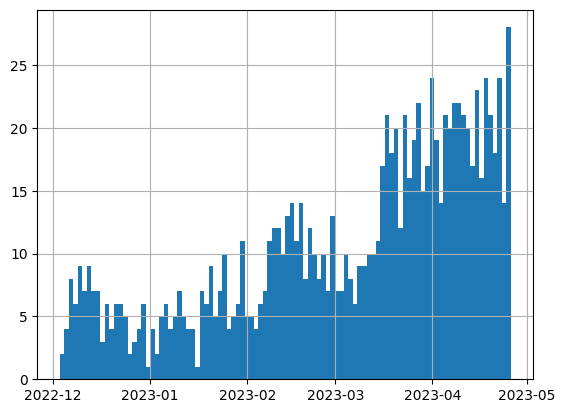

In [9]:
#Plotting the amount of posts over time
print(f'Plot of all posts over time: {df_post["Date & Time"].hist(bins=100)}')
plt.show()

In [11]:
#Visualizing the top five most popular posts

#Getting the top five most popular posts
top_posts = df_post.sort_values("Score", ascending=False).head(5)

#Printing the top five most popular posts
print("Top 5 most popular posts:")
for i, post in top_posts.iterrows():
    print(f"{i + 1}. {post['Title Post']} (Score: {post['Score']}, Comments: {post['Number of Comments']})")


Top 5 most popular posts:
958. Imagine someone failing their class because of this reliable ChatGPT detector... (Score: 50350, Comments: 1290)
947. The newest version of ChatGPT passed the US medical licensing exam with flying colors — and diagnosed a 1 in 100,000 condition in seconds (Score: 45093, Comments: 2932)
949. Well that escalated quickly ChatGPT (Score: 35960, Comments: 625)
1. Was curious if GPT-4 could recognize text art (Score: 35791, Comments: 619)
963. ChatGPT passes MBA exam given by a Wharton professor. (Score: 33066, Comments: 2178)
